In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry
import descartes

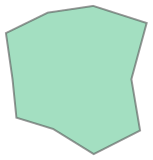

In [2]:
parts = 10
pts = []
for i in range(parts):
    angle = 2 * np.pi * i / parts
    r = np.random.random() * 49 + 50
    x = 100 + r * np.cos(angle)
    y = 100 + r * np.sin(angle)
    pts.append((x, y))
poly = shapely.geometry.Polygon(pts)
poly

In [3]:
xmin, ymin, xmax, ymax = poly.bounds
xd, yd = xmax - xmin, ymax - ymin
points = np.random.random(size=(10,2)) * np.asarray([xd,yd]) + np.asarray([xmin,ymin])

In [4]:
def f(n):
    xmin, ymin, xmax, ymax = poly.bounds
    xd, yd = xmax - xmin, ymax - ymin
    points = np.random.random(size=(n,2)) * np.asarray([xd,yd]) + np.asarray([xmin,ymin])
    return [ pt for pt in points
        if poly.intersects(shapely.geometry.Point(*pt)) ]

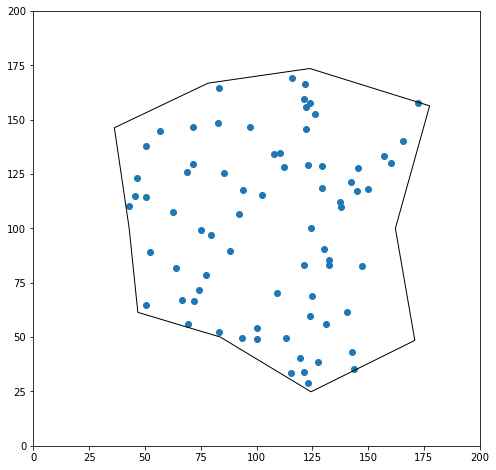

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ax.add_patch(descartes.PolygonPatch(poly, fc="none", ec="black"))
ax.set(xlim=[0,200], ylim=[0,200])
ax.scatter(*np.asarray(f(100)).T)

In [6]:
def g(n):
    xmin, ymin, xmax, ymax = poly.bounds
    xd, yd = xmax - xmin, ymax - ymin
    points = np.random.random(size=(n,2)) * np.asarray([xd,yd]) + np.asarray([xmin,ymin])
    mps = poly.intersection(shapely.geometry.MultiPoint(points))
    return np.asarray(mps)

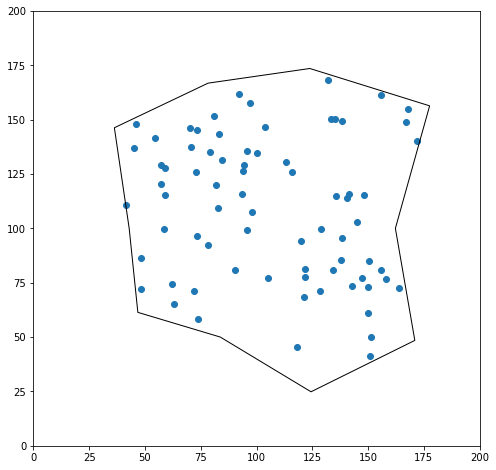

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
ax.add_patch(descartes.PolygonPatch(poly, fc="none", ec="black"))
ax.set(xlim=[0,200], ylim=[0,200])
ax.scatter(*np.asarray(g(100)).T)

In [8]:
def h(n):
    xmin, ymin, xmax, ymax = poly.bounds
    xd, yd = xmax - xmin, ymax - ymin
    points = np.random.random(size=(n,2)) * np.asarray([xd,yd]) + np.asarray([xmin,ymin])
    mps = poly.intersection(shapely.geometry.MultiPoint(points))
    if mps.is_empty:
        return []
    if mps.geometryType() == "Point":
        return [ list(mps.coords)[0] ]
    return [ list(pt.coords)[0] for pt in mps ]

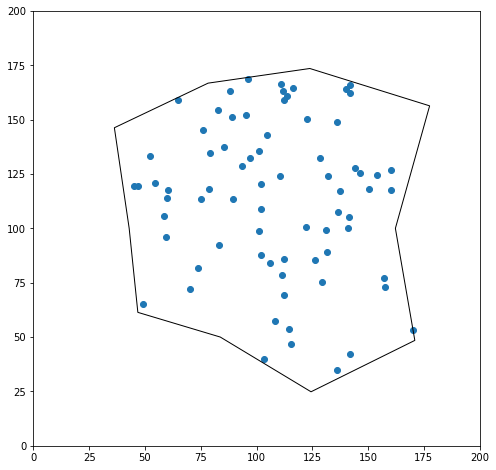

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.add_patch(descartes.PolygonPatch(poly, fc="none", ec="black"))
ax.set(xlim=[0,200], ylim=[0,200])
ax.scatter(*np.asarray(h(100)).T)

In [10]:
%timeit( f(1) )
%timeit( g(1) )
%timeit( h(1) )

10000 loops, best of 3: 159 µs per loop
1000 loops, best of 3: 271 µs per loop
1000 loops, best of 3: 256 µs per loop


In [11]:
%timeit( f(10) )
%timeit( g(10) )
%timeit( h(10) )

1000 loops, best of 3: 740 µs per loop
1000 loops, best of 3: 629 µs per loop
1000 loops, best of 3: 666 µs per loop


In [12]:
%timeit( f(100) )
%timeit( g(100) )
%timeit( h(100) )

100 loops, best of 3: 6.47 ms per loop
100 loops, best of 3: 3.75 ms per loop
100 loops, best of 3: 4.41 ms per loop


In [13]:
%timeit( f(1000) )
%timeit( g(1000) )
%timeit( h(1000) )

10 loops, best of 3: 63.2 ms per loop
10 loops, best of 3: 35.1 ms per loop
10 loops, best of 3: 41.2 ms per loop


# Sampling close to a point

In [14]:
def near(x, y):
    while True:
        xx, yy = np.random.random(size=2) * 10 - 5
        if ( poly.intersects(shapely.geometry.Point(x+xx, y+yy)) and
            xx*xx+yy*yy <= 25 ):
            return xx+x, yy+y

In [15]:
%timeit( near(100,100) )

The slowest run took 8.15 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 105 µs per loop


In [16]:
base_points = f(100)

def ff(loops):
    out = []
    for (x, y) in base_points:
        out.append( [near(x, y) for _ in range(loops)] )
    return out
        
%timeit(ff(1))

100 loops, best of 3: 6.75 ms per loop


In [18]:
%timeit(ff(100))

1 loop, best of 3: 655 ms per loop
